In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import networkx as nx
import random

def create_connected_graph(n, p, L):
    while True:
        G = nx.gnp_random_graph(n, p)
        if nx.is_connected(G):
            for (u, v) in G.edges():
                G[u][v]['weight'] = random.uniform(*L)
            return G

def simulate_traffic(graph, T):
    traffic_data = {}
    for _ in range(T):
        start, end = random.sample(list(graph.nodes()), 2)
        path = nx.shortest_path(graph, source=start, target=end)
        for i in range(len(path) - 1):
            edge = (path[i], path[i + 1])
            traffic_data[edge] = traffic_data.get(edge, 0) + 1
    return traffic_data

def recommend_roads(graph, traffic_data, k):
    benefits = {}
    for edge in graph.edges():
        if edge not in traffic_data:
            traffic_data[edge] = 0
        d = graph[edge[0]][edge[1]]['weight']
        nt_xy = traffic_data[edge]
        nt_yx = traffic_data.get((edge[1], edge[0]), 0)
        spd = nx.shortest_path_length(graph, source=edge[0], target=edge[1])
        benefit = (spd - d) * (nt_xy + nt_yx)
        benefits[edge] = benefit

    sorted_benefits = dict(sorted(benefits.items(), key=lambda x: x[1], reverse=True))
    recommended_roads = list(sorted_benefits.keys())[:k]
    return recommended_roads

# Example usage
N = 60
p = 0.05
L = (5, 25)
T = 36000  # 10 hours simulation
k = 2
f = 0.6

# Create a random connected graph
G = create_connected_graph(N, p, L)

# Simulate traffic and recommend roads
traffic_data = simulate_traffic(G, T)
recommended_roads = recommend_roads(G, traffic_data, k)

print("Recommended roads for construction:")
for road in recommended_roads:
    print(road)

Recommended roads for construction:
(36, 51)
(31, 58)


In [4]:
def create_random_connected_graph(n, p, L):
    while True:
        G = nx.gnp_random_graph(n, p)
        if nx.is_connected(G):
            for (u, v) in G.edges():
                G[u][v]['weight'] = random.uniform(*L)
            return G

def calculate_benefits(graph, traffic_data):
    benefits = {}
    for edge in graph.edges():
        if edge not in traffic_data:
            traffic_data[edge] = 0
        d = graph[edge[0]][edge[1]]['weight']
        nt_xy = traffic_data[edge]
        nt_yx = traffic_data.get((edge[1], edge[0]), 0)
        spd = nx.shortest_path_length(graph, source=edge[0], target=edge[1])
        benefit = (spd - d) * (nt_xy + nt_yx)
        benefits[edge] = benefit
    return benefits

def city_planning(graph, T, k, f):
    traffic_data = simulate_traffic(graph, T)
    recommended_roads = recommend_roads(graph, traffic_data, k)
    benefits = calculate_benefits(graph, traffic_data)
    return recommended_roads, benefits

# R2
print("\n=== Part R2 ===")
G_r2 = nx.Graph()
G_r2.add_edges_from([(0, 1, {'weight': 10}), (0, 2, {'weight': 17}), (1, 2, {'weight': 20})])  # Sample graph

traffic_data_r2 = simulate_traffic(G_r2, T)
benefits_r2 = calculate_benefits(G_r2, traffic_data_r2)

print("Benefits for constructing new roads in R2:")
for edge, benefit in benefits_r2.items():
    print(f"{edge}: {benefit}")

# R3
print("\n=== Part R3 ===")
N = 60
p = 0.05
L = (5, 25)
G_r3 = create_random_connected_graph(N, p, L)

T = 36000  # Reset simulation time for R3
recommended_roads_r3, benefits_r3 = city_planning(G_r3, T, k, f)

print("Recommended roads for construction in R3:")
for road in recommended_roads_r3:
    print(road)

print("\nBenefit values for recommended roads in R3:")
for road in recommended_roads_r3:
    print(f"{road}: {benefits_r3[road]}")

# R4
print("\n=== Part R4 ===")
f_r4 = 0.8
recommended_roads_r4, benefits_r4 = city_planning(G_r3, T, k, f_r4)

print("Recommended roads for construction in R4:")
for road in recommended_roads_r4:
    print(road)

print("\nBenefit values for recommended roads in R4:")
for road in recommended_roads_r4:
    print(f"{road}: {benefits_r4[road]}")

# R5
print("\n=== Part R5 ===")
p_r5 = p * 2  # Double the connectivity
G_r5 = create_random_connected_graph(N, p_r5, L)

T = 36000  # Reset simulation time for R5
recommended_roads_r5, benefits_r5 = city_planning(G_r5, T, k, f)

print("Recommended roads for construction in R5:")
for road in recommended_roads_r5:
    print(road)

print("\nBenefit values for recommended roads in R5:")
for road in recommended_roads_r5:
    print(f"{road}: {benefits_r5[road]}")



=== Part R2 ===
Benefits for constructing new roads in R2:
(0, 1): -108270
(0, 2): -191728
(1, 2): -227753

=== Part R3 ===
Recommended roads for construction in R3:
(7, 36)
(28, 42)

Benefit values for recommended roads in R3:
(7, 36): -2376.895277162912
(28, 42): -2498.5459322816896

=== Part R4 ===
Recommended roads for construction in R4:
(7, 36)
(28, 42)

Benefit values for recommended roads in R4:
(7, 36): -2248.5652504616282
(28, 42): -2742.4279057514163

=== Part R5 ===
Recommended roads for construction in R5:
(45, 54)
(17, 45)

Benefit values for recommended roads in R5:
(45, 54): -845.6964137840321
(17, 45): -947.2425726654752


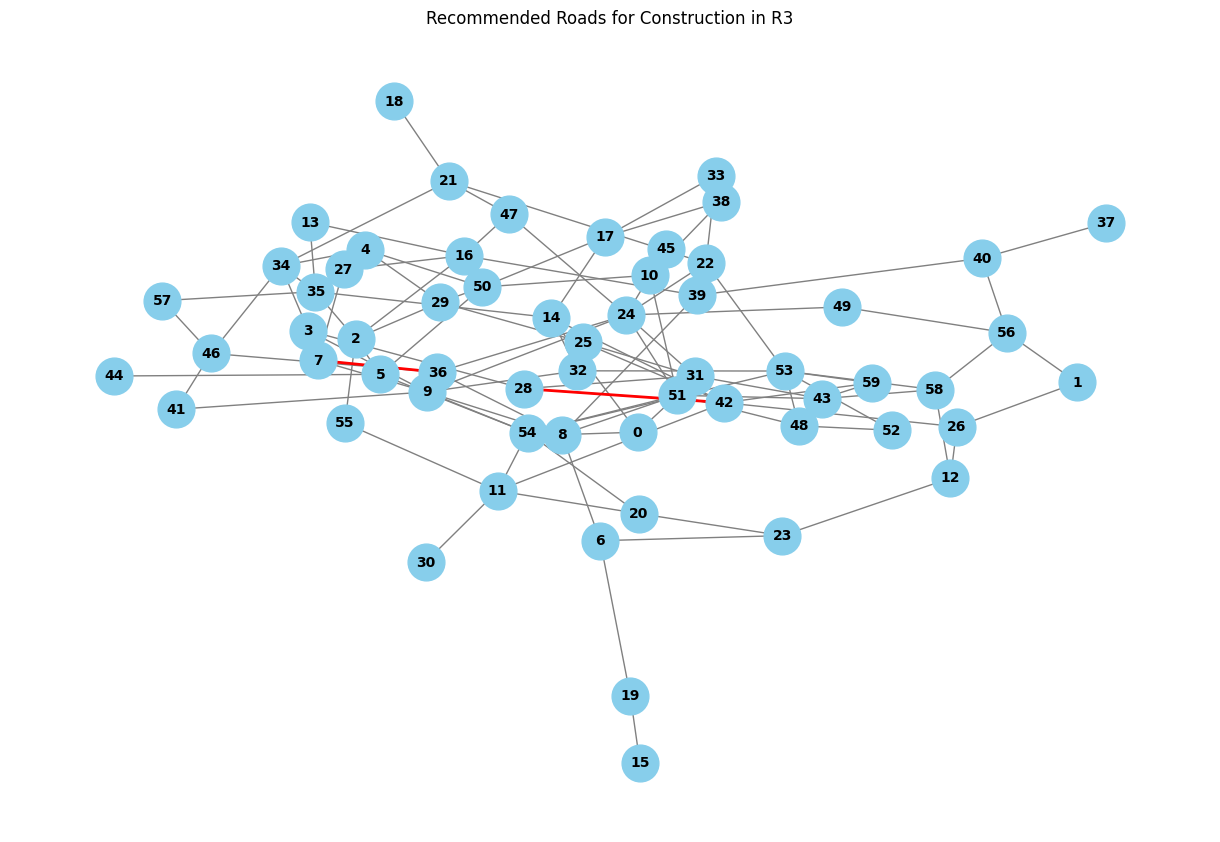

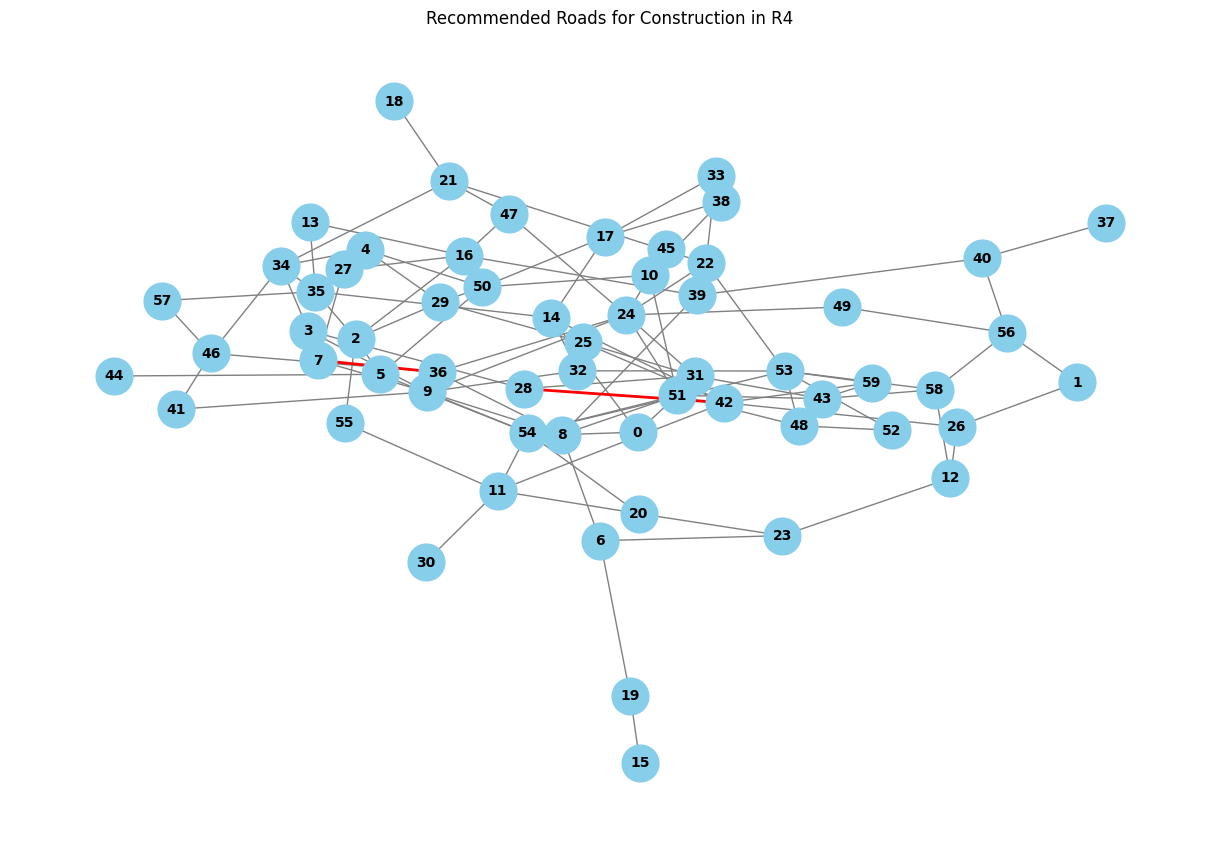

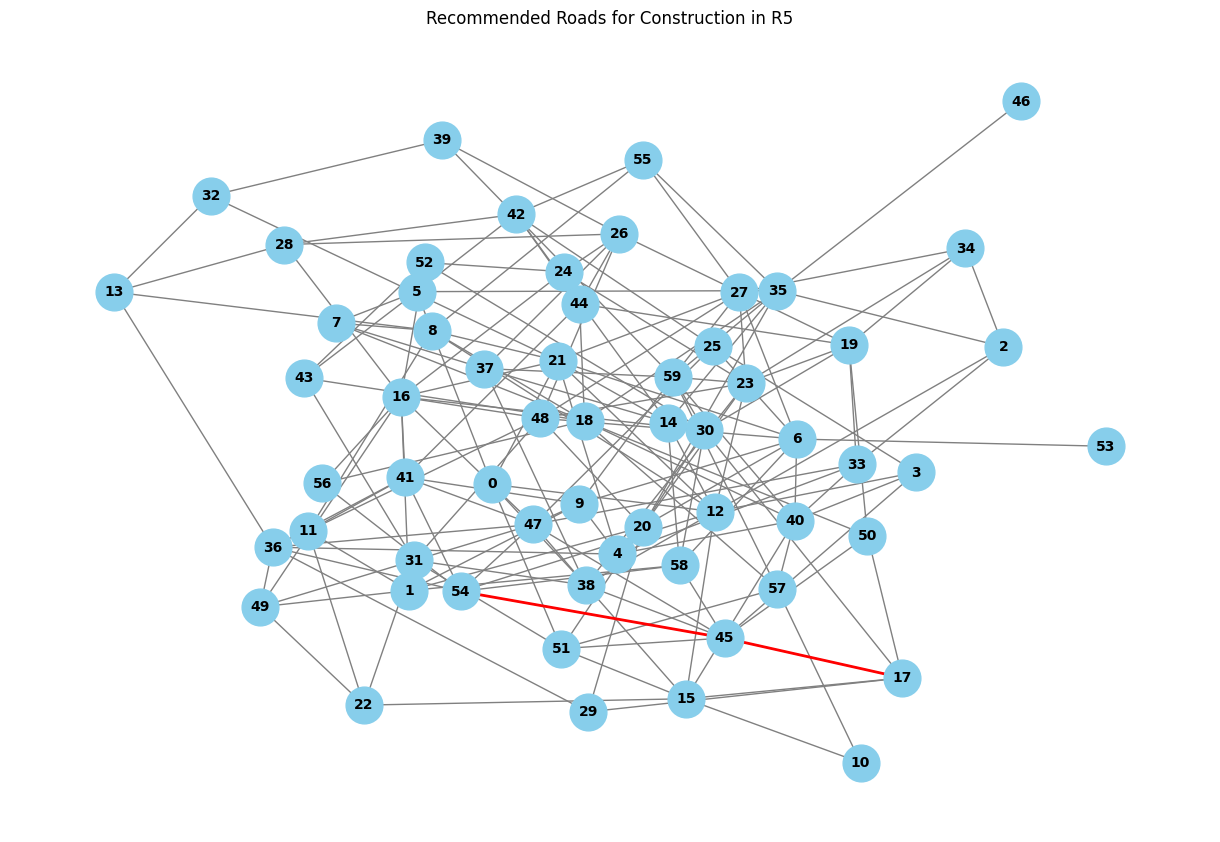

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def visualize_graph_with_recommended_roads(graph, recommended_roads, title):
    pos = nx.spring_layout(graph, seed=42)  # Positions for all nodes

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray', font_size=10, font_weight='bold', font_color='black')

    # Highlight recommended roads
    nx.draw_networkx_edges(graph, pos, edgelist=recommended_roads, edge_color='red', width=2)

    plt.title(title)
    plt.show()

# Visualize recommended roads for R3
G_r3_with_recommended = G_r3.copy()
for road in recommended_roads_r3:
    G_r3_with_recommended.add_edge(*road)

visualize_graph_with_recommended_roads(G_r3_with_recommended, recommended_roads_r3, "Recommended Roads for Construction in R3")

# Visualize recommended roads for R4
G_r4_with_recommended = G_r3.copy()
for road in recommended_roads_r4:
    G_r4_with_recommended.add_edge(*road)

visualize_graph_with_recommended_roads(G_r4_with_recommended, recommended_roads_r4, "Recommended Roads for Construction in R4")

# Visualize recommended roads for R5
G_r5_with_recommended = G_r5.copy()
for road in recommended_roads_r5:
    G_r5_with_recommended.add_edge(*road)

visualize_graph_with_recommended_roads(G_r5_with_recommended, recommended_roads_r5, "Recommended Roads for Construction in R5")
